# Geoprocessing
## I. Dissolve
## II. Merge
### 1) Shape 파일과 DataFrame (엑셀/파이썬) 파일 병합
### 2) 서로 다른 지역을 나타내는 2개의 Shape 파일 병합
- 좌표계가 통일 된 각각의 다른 shape파일의 지도 불러오기
    - '서울시(서북권)', '서울시(서남권)', '서울시(동북권)', '서울시(동남권)', '서울시(도심권)' shape 파일들 레이어에 추가
    - 좌표계는 5181로 통일되어있음

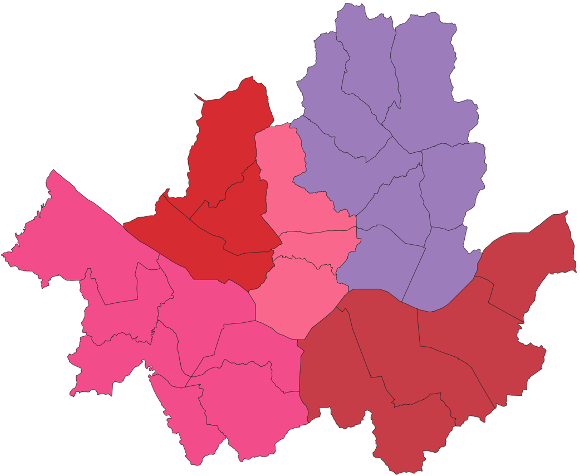

In [3]:
from IPython.display import display, Image
display(Image('image35_files.png'))

- `Processing Toolbox` (Merge 검색) > `Vertor general` 밑에 Merge `Vector layers` > `Parameters` > `Input layers`: '서울시(서북권)', '서울시(서남권)', '서울시(동북권)', '서울시(동남권)', '서울시(도심권)' 체크하기 > 뒤로가기, `Destination CRS`: 알맞은 좌표계 설정 (EPSG: 5181), `Merged`: Save to File ...: 저장할 경로, 이름, shape 파일로 설정 (서울시(병합)_EPSG5181) > `Run`

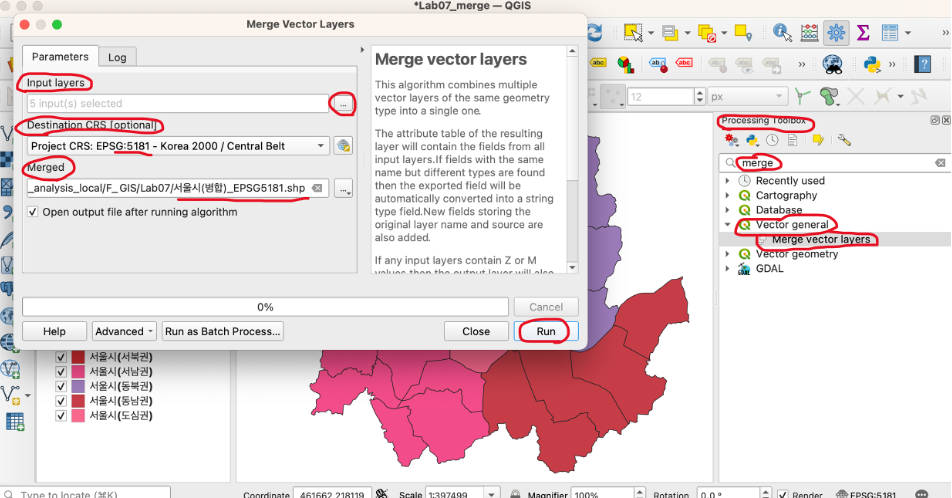

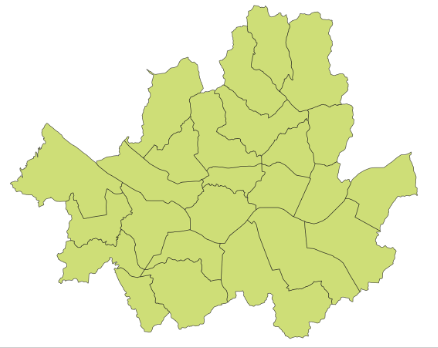

In [5]:
from IPython.display import display, Image
display(Image('image36_merge.png'))
display(Image('image37_result.png'))

## III. Buffer
- 버퍼란, 어떤 지점이 있을 경우 그 지점을 중심으로 일정 범위 안의 지역들을 강조해주는 표시 기능
### 1) 실습
- 지도 shape 파일 위에 포인트 shape 파일 가져오기
    - 'gangnam_gu_dong' shape 파일 위에 'gangnam_subway_station' shape 파일 레이어에 추가
- Processing Toolbox (buffer 검색) > Vector geometry > Buffer > Parameters > Input layer: 원하는 point shape 파일 (gangnam_subway_station [EPSGL5181]), Distance: 420 meter, Buffered: Save to File 저장할 경로, 이름, shape 형식 설정(강남_역세권.shp)> Run
- 지하철역 지점 shape 파일 (gangnam_subway_station)을 이 buffer (강남_역세권) 위에다 올리면 이렇게 된다
- 만약 buffer Distance 입력하는 창 오른쪽에 에러가 떠서 단위 (meter 등)가 안 뜰 경우 해당 레이어 shape파일의 좌표계를 바꿔보기 (ESPG:4326은 안 되지만 ESPG:5187은 됨!) 

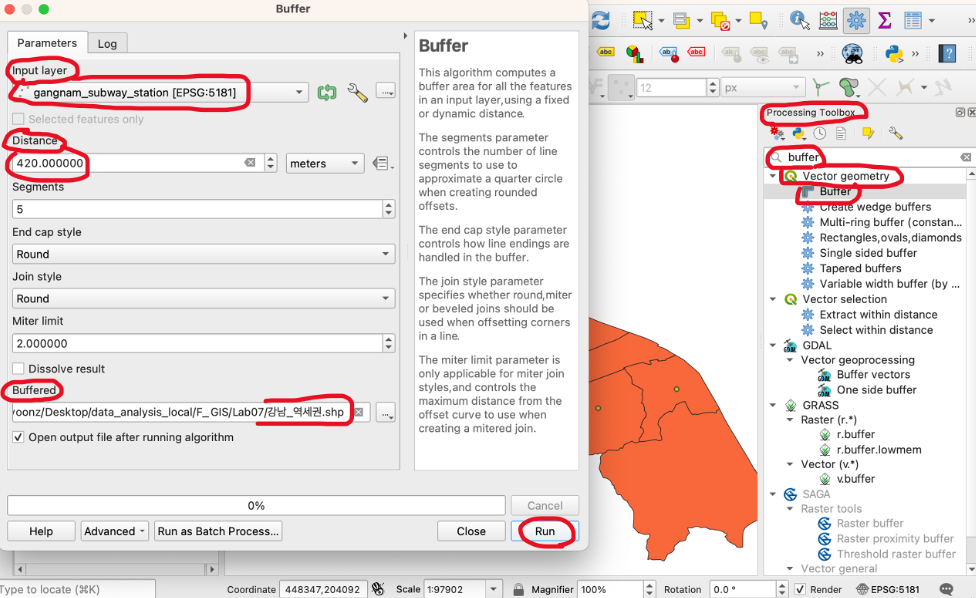

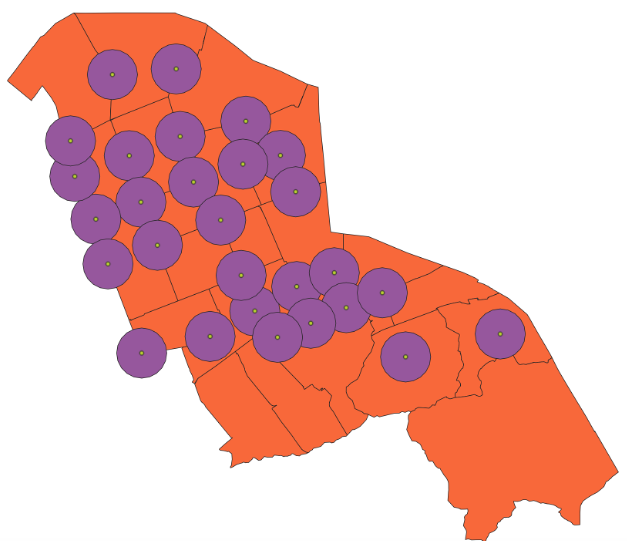

In [7]:
from IPython.display import display, Image
display(Image('image38_buffer.png'))
display(Image('image39_result.png'))

## III Clip (자르기)
- 클립이란 뭔가를 잘라낸다는 뜻
- 어느 한 레이어를 다른 레이어의 모양에 맞게 잘라낼 수 있다
### 1) 더블 역세권 확인하기
- 강남 건물 (gangnam_gu_buildings) shape 파일 레이어 추가
- 강남 건물(gangnam_gu_buildings) 레이어 위에 역세권 레이어 (강남_역세권) 올리기
- 역세권 레이어 (강남_역세권) Properties > Symbology에서
    - Layer Renderings > Opacity 조절 > Apply > OK
    - Project Styles > hashed 모양 선택 > Apply > OK
### 2) 한 레이어를 다른 레이어 모양에 맞게 Clip 자르기 (GDAL)
- `Processing Toolbox` (Clip 검색) > `GDAL` > `Vector geoprocessing` > `Clip vector by mask layer` > `Parameters` > `Input layer`: 자르고자 하는 shape 파일 (gangnam_gu_buildings[ESPG:5181]), `Mask layer`: 잘라내고자하는 모양의 shape 파일 (강남_역세권[EPSG:5181]),` Advanced Parameters` 아래 `Clipped` (mask): 저장할 경로, 이름, shape파일로 설정 (강남_역세권_빌딩.shp) > `Run`

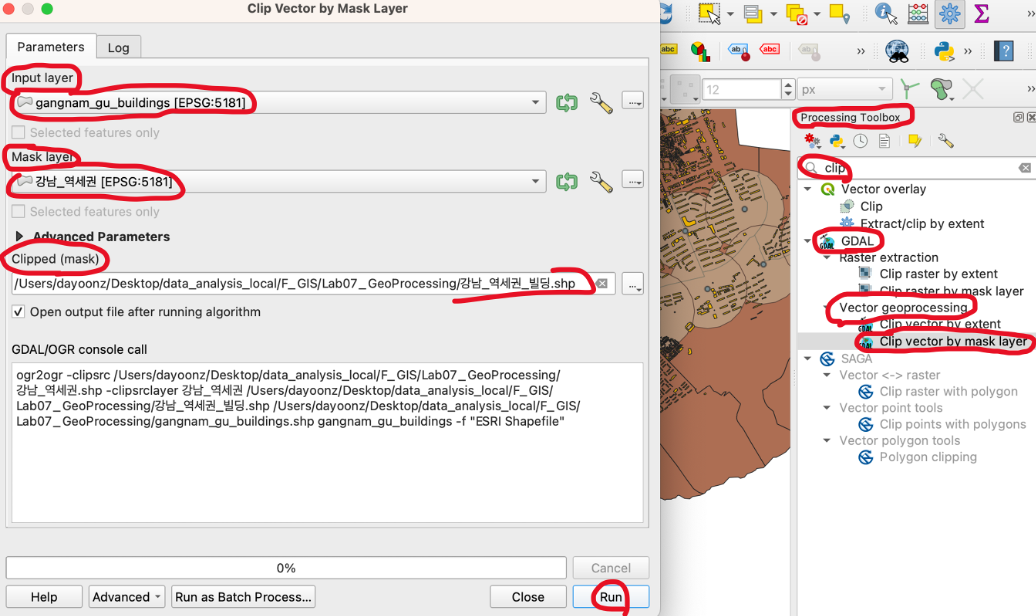

In [9]:
from IPython.display import display, Image
display(Image('image40_clip.png'))

### 2) 한 레이어를 다른 레이어 모양에 맞게 Clip 자르기 (Vector overlay)
- `Processing Toolbox` (Clip 검색) > `Vector overlay` > `Clip` > `Parameters` > `Input layer`: 자르고자 하는 shape 파일 (gangnam_gu_buildings[ESPG:5181]), `Overlay layer`: 잘라내고자하는 모양의 shape 파일 (강남_역세권[EPSG:5181]), `Clipped`: 저장할 경로, 이름, shape파일로 설정 (강남_역세권_빌딩.shp) > `Run`

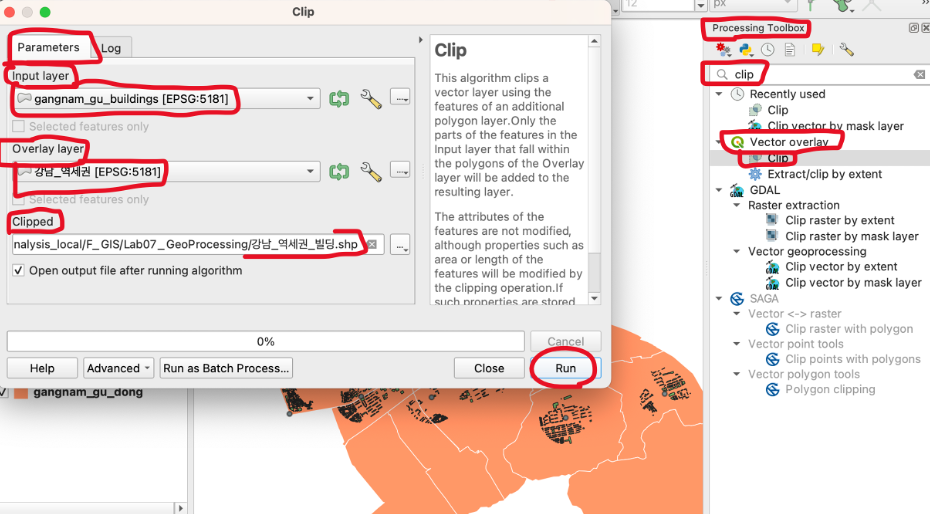

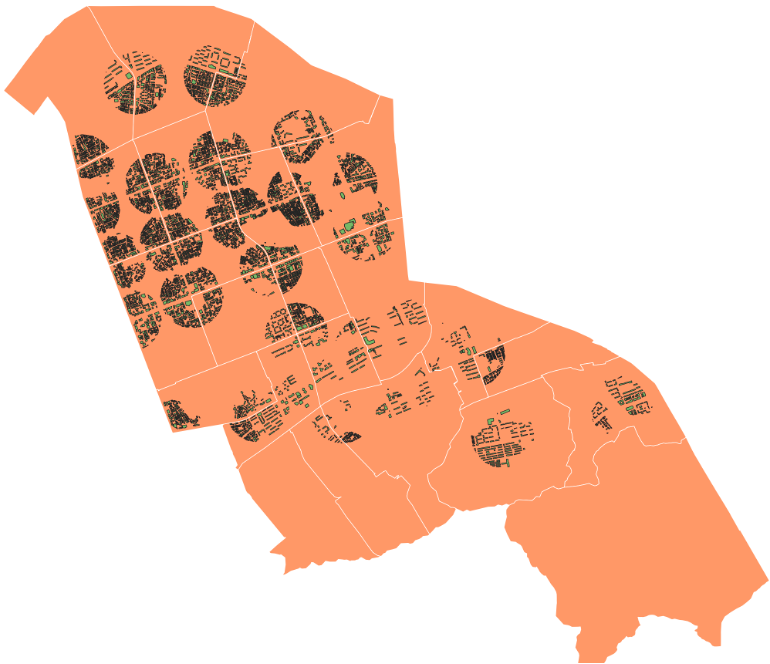

In [11]:
from IPython.display import display, Image
display(Image('image41_clip2.png'))
display(Image('image42_result.png'))

- 강남_역세권_빌딩 > Open Attribute Table (속성 테이블 열기)
    - BUILD_USAGE = 건물 용도
    - LH에서 배포하는 자료에 따르면 토지이용분류 표준색도 가 정해져있다 -> 토지의 이용 용도에 따라 표시하는 색상이 정해져있다
- 강남_역세권_빌딩 > Properties > Symbology > Categorized > Value: 분류할 필드 (BUILD_USAGE) > Classify 클릭 
    - -> 랜덤으로 종류에 따라 색이 정해짐
    - 색상을 바꾸고 싶으면 각 필드의 네모난 색 박스를 더블클릭 시 색을 지정할 수 있음

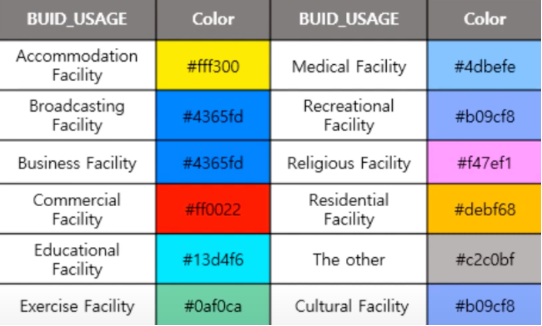

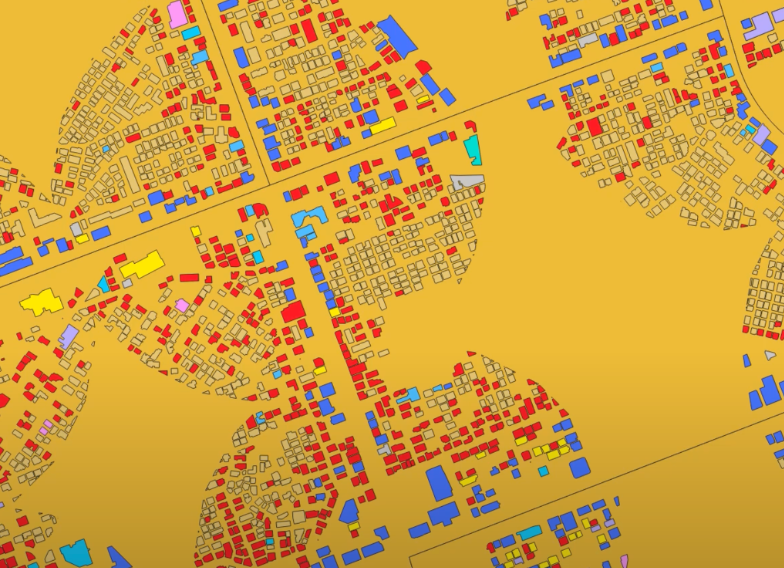

In [12]:
from IPython.display import display, Image
display(Image('image43_usage.png'))
display(Image('image44_result.png'))

## III Union (합치기)
- 2 개의 레이어를 공간적으로 합치는 기능
- merge와의 차이 - merge는 겹치지 않는 레이어들을 합치는 반면, union은 겹치는 부분까지 합치는 것
### 1) 두 개의 겹치는 레이어 (polygon) 합치기
- 프로잭트에 gangnam_gu_dong.shp과 강남_역세권.shp 파일 레이어로 추가
- Processing Toolbox (union 검색) > Vector overlay > Union (multiple) > Parameters > Input layer: 합치고자 하는 레이어, Over layers [optional]: ... 눌러서 합치고자 하는 레이어(들) 체크 (강남_역세권 [EPSG:5181]), 뒤로가기

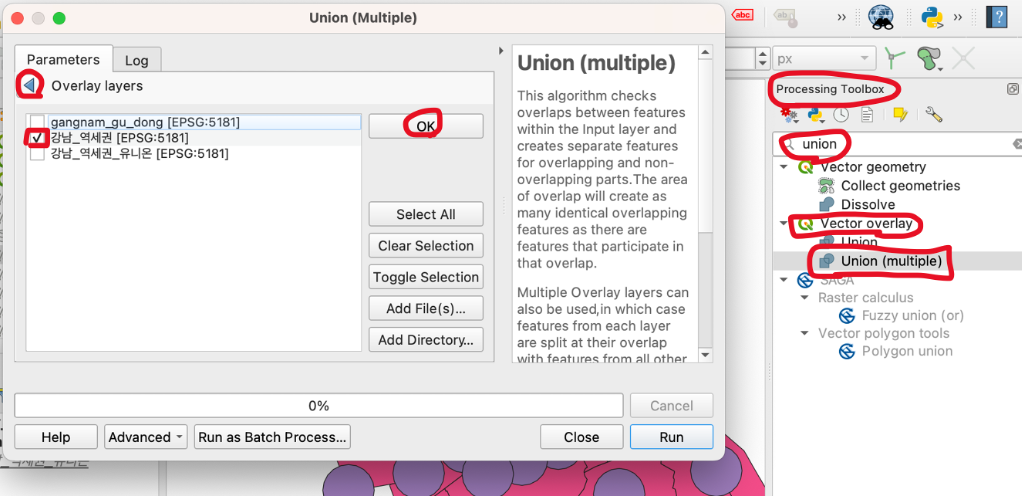

In [13]:
from IPython.display import display, Image
display(Image('image45_union.png'))

- (continued) Union: 저장할 경로, 이름, shp파일로 설정 (강남_역세권_union.shp) > Run
    - polygon만 병합된 것이 아니라 속성 테이블 (Attribute Table)을 보면 데이터프레임 정보들도 병합 되어있다
    - 동에 있는 역이름! - 좌표값 기준으로, 지리상으로 중첩된 부분을 병합한 것임. 파이썬으로는 못함. 와우! 대단쓰!

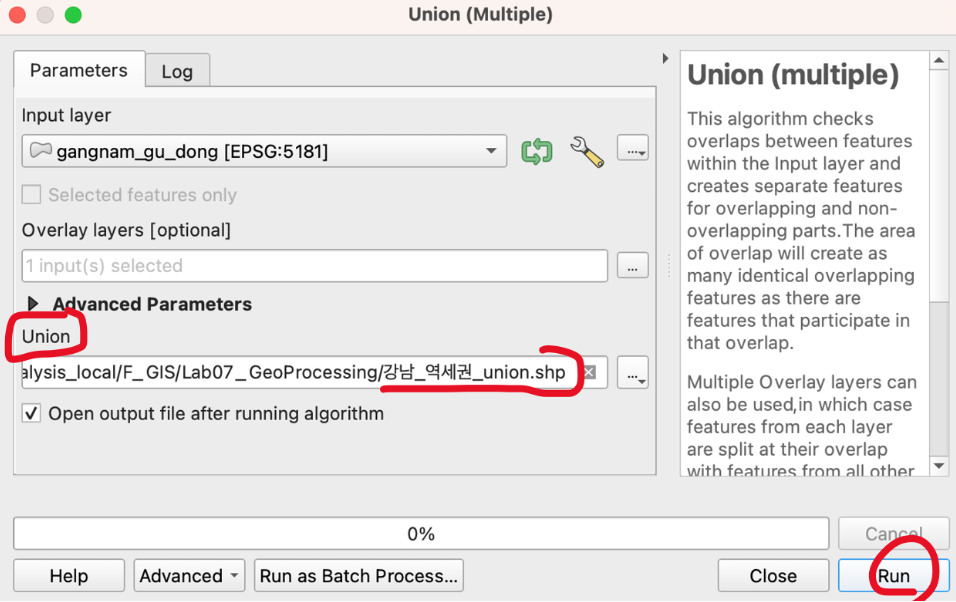

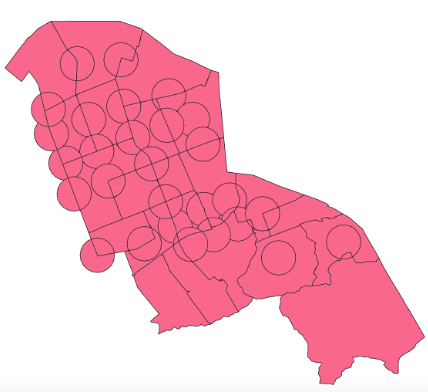

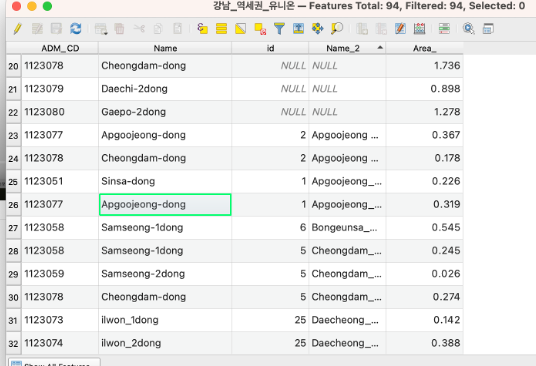

In [16]:
from IPython.display import display, Image
display(Image('image46_union2.png'))
display(Image('image47_result.png'))
display(Image('image48_attributetable.png'))

### 2) 새로운 필드에 계산식으로 데이터 추가 (면적 area 구하기)
- shape 파일 레이어의 속성 테이블 얼기 (강남_역세권_union 더블클릭) > 편집모드 클릭 (맨 위 맨 왼쪽 연필모양 박스 선택 - Toggle Editing Mode Ctrl + E), 계산식으로 필드추가 클릭 (맨 위 오른쪽에서 4번째 - Open field calculator Ctrl + I) > Create a new field 체크 > Output field name: 생성할 필드 이름 지정 (Area), Output field type: Decimal number (real), Output field length랑 Precision은 소수점 자리를 나타내는 것임 (10, 3) > Expression > $area / 1000000 라고 입력 또는 오른쪽에 Geometry > $area 더블클릭 후 /1000000 입력
    - 1000000으로 나누는 이유:$area 단위가 제곱 미터이기 때문에 -> 제곱 미터를 `제곱 킬로미터` 단위로 환산/바꾸기 위하여

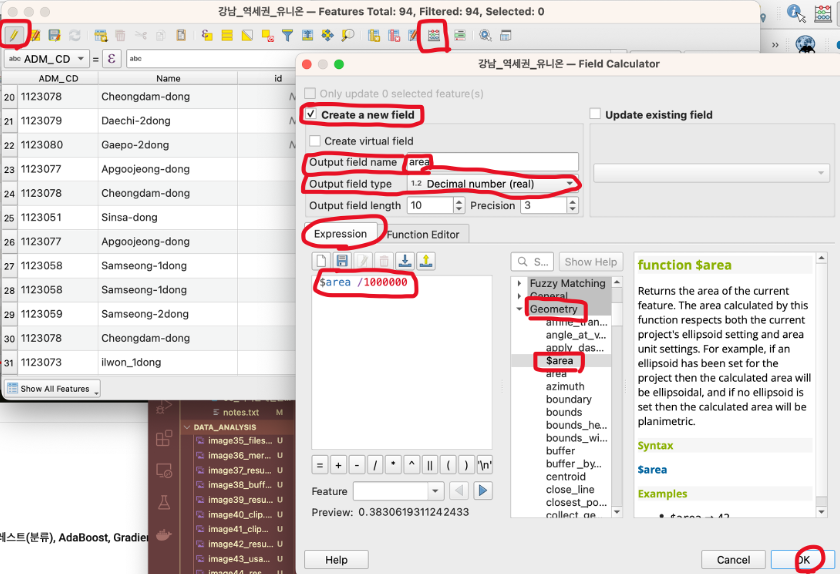

In [17]:
from IPython.display import display, Image
display(Image('image49_area.png'))

- 속성 테이블에 그 지역의 면적이 제곱킬로미터 단위로 컬럼이 추가되있을 것임